In [1]:
# Database Connection
import sqlalchemy
from sqlalchemy import create_engine, inspect, text

# Data Science
import pandas as pd
import numpy as np

# Data Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Assign SQL variables
SQL_USERNAME = "postgres"
SQL_PASSWORD = "postgres" # change this
SQL_IP = "localhost"
PORT = 5432
DATABASE = "project_two_etl" # change this

In [3]:
# Set up Engine
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string)

In [4]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Use the inspector to print the column names within each table and its data types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

contacts
contact_id INTEGER
first_name VARCHAR(100)
last_name VARCHAR(250)
email VARCHAR(250)
last_updated TIMESTAMP

campaign
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(100)
description VARCHAR(500)
goal INTEGER
pledged INTEGER
outcome VARCHAR(100)
backers_count INTEGER
country VARCHAR(5)
currency VARCHAR(5)
launched_date DATE
end_date DATE
category_id VARCHAR(5)
subcategory_id VARCHAR(100)
last_updated TIMESTAMP

category
category_id VARCHAR(5)
category VARCHAR(100)
last_updated TIMESTAMP

subcategory
subcategory_id VARCHAR(8)
subcategory VARCHAR(100)
last_updated TIMESTAMP



In [5]:
# Retrieve full contacts table from Postgres
query = """
    SELECT *
    FROM contacts
    """
contacts = pd.read_sql(text(query), con=engine)
contacts.head()

,contact_id,first_name,last_name,email,last_updated
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr,2024-07-16 15:26:49.529022
1,3765,Mariana,Ellis,mariana.ellis@rossi.org,2024-07-16 15:26:49.529022
2,4187,Sofie,Woods,sofie.woods@riviere.com,2024-07-16 15:26:49.529022
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com,2024-07-16 15:26:49.529022
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com,2024-07-16 15:26:49.529022


In [6]:
# Retrieve full category table from Postgres
query = """
    SELECT *
    FROM category
    """
category = pd.read_sql(text(query), con=engine)
category.head()

,category_id,category,last_updated
0,cat1,food,2024-07-16 15:27:52.504756
1,cat2,music,2024-07-16 15:27:52.504756
2,cat3,technology,2024-07-16 15:27:52.504756
3,cat4,theater,2024-07-16 15:27:52.504756
4,cat5,film & video,2024-07-16 15:27:52.504756


In [7]:
# Retrieve full subcategory table from Postgres
query = """
    SELECT *
    FROM subcategory
    """
subcategory = pd.read_sql(text(query), con=engine)
subcategory.head()

,subcategory_id,subcategory,last_updated
0,subcat1,food trucks,2024-07-16 15:28:18.332769
1,subcat2,rock,2024-07-16 15:28:18.332769
2,subcat3,web,2024-07-16 15:28:18.332769
3,subcat4,plays,2024-07-16 15:28:18.332769
4,subcat5,documentary,2024-07-16 15:28:18.332769


In [8]:
# Retrieve full campaign table from Postgres
query = """
    SELECT *
    FROM campaign
    """
campaign = pd.read_sql(text(query), con=engine)
campaign.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,category_id,subcategory_id,last_updated
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1,2024-07-16 20:08:00.907404
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,2021-01-25,2021-05-25,cat2,subcat2,2024-07-16 20:08:00.907404
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,2020-12-17,2021-12-30,cat3,subcat3,2024-07-16 20:08:00.907404
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,2021-10-21,2022-01-17,cat2,subcat2,2024-07-16 20:08:00.907404
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,2020-12-21,2021-08-23,cat4,subcat4,2024-07-16 20:08:00.907404


In [9]:
# Query Question #1 - Compare Success vs. Failure for all Categories, Grouped By (US, CA, CH, AU) for subplots

In [10]:
# Query for 'US'
query = """
    SELECT 
        cat.category,
        cam.outcome,
        COUNT(cam.outcome) AS count,
        cam.country
    FROM campaign AS cam
    JOIN category AS cat ON (cam.category_id = cat.category_id)
    WHERE cam.outcome IN ('successful', 'failed')
        AND cam.country = 'US'
    GROUP BY cat.category, cam.outcome, cam.country
    ORDER BY cat.category, cam.outcome DESC;
    """
question1us = pd.read_sql(text(query), con=engine)
question1us.head(10)

,category,outcome,count,country
0,film & video,successful,76,US
1,film & video,failed,41,US
2,food,successful,17,US
3,food,failed,15,US
4,games,successful,14,US
5,games,failed,20,US
6,journalism,successful,4,US
7,music,successful,79,US
8,music,failed,44,US
9,photography,successful,24,US


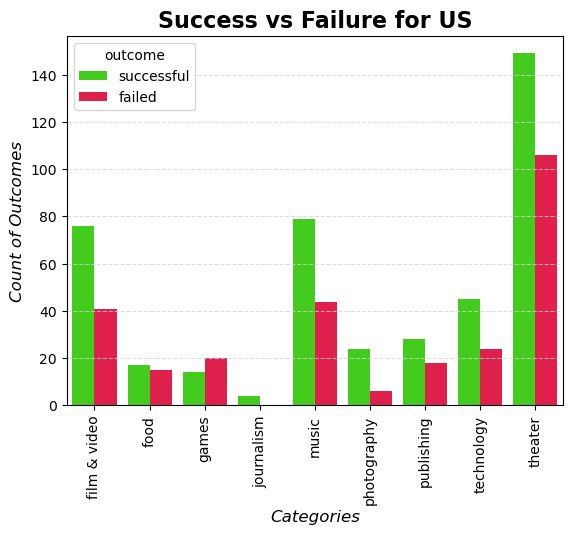

In [56]:
# Dataset
question1us

# Plot for question1us
sns.barplot(question1us, x='category', y='count', hue='outcome', palette='prism')

# customizations
plt.xlabel("Categories", fontstyle="italic", fontsize=12)
plt.ylabel("Count of Outcomes", fontstyle="italic", fontsize=12)
plt.title("Success vs Failure for US", fontsize=16, fontweight="bold")
plt.xticks(rotation=90)

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.75)

# save chart in Charts folder
plt.savefig('../Charts/success_vs_failure_US.png', bbox_inches='tight')

# show
plt.show()

In [12]:
# Query for 'CA'
query = """
    SELECT 
        cat.category,
        cam.outcome,
        COUNT(cam.outcome) AS count,
        cam.country
    FROM campaign AS cam
    JOIN category AS cat ON (cam.category_id = cat.category_id)
    WHERE cam.outcome IN ('successful', 'failed')
        AND cam.country = 'CA'
    GROUP BY cat.category, cam.outcome, cam.country
    ORDER BY cat.category, cam.outcome DESC;
    """
question1ca = pd.read_sql(text(query), con=engine)
question1ca.head(10)

,category,outcome,count,country
0,film & video,successful,3,CA
1,film & video,failed,4,CA
2,food,failed,2,CA
3,music,successful,5,CA
4,music,failed,2,CA
5,photography,failed,2,CA
6,publishing,successful,3,CA
7,technology,successful,4,CA
8,theater,successful,7,CA
9,theater,failed,9,CA


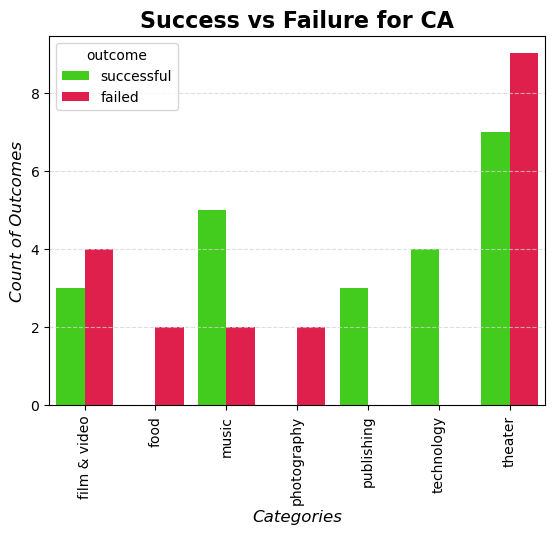

In [57]:
# Dataset
question1ca

# Plot for question1ca
sns.barplot(question1ca, x='category', y='count', hue='outcome', palette='prism')

# customizations
plt.xlabel("Categories", fontstyle="italic", fontsize=12)
plt.ylabel("Count of Outcomes", fontstyle="italic", fontsize=12)
plt.title("Success vs Failure for CA", fontsize=16, fontweight="bold")
plt.xticks(rotation=90)

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.75)

# save chart in Charts folder
plt.savefig('../Charts/success_vs_failure_CA.png', bbox_inches='tight')

# show
plt.show()

In [14]:
# Query for 'CH'
query = """
    SELECT 
        cat.category,
        cam.outcome,
        COUNT(cam.outcome) AS count,
        cam.country
    FROM campaign AS cam
    JOIN category AS cat ON (cam.category_id = cat.category_id)
    WHERE cam.outcome IN ('successful', 'failed')
        AND cam.country = 'CH'
    GROUP BY cat.category, cam.outcome, cam.country
    ORDER BY cat.category, cam.outcome DESC;
    """
question1ch = pd.read_sql(text(query), con=engine)
question1ch.head(10)

,category,outcome,count,country
0,film & video,successful,3,CH
1,film & video,failed,2,CH
2,games,successful,1,CH
3,music,successful,2,CH
4,music,failed,2,CH
5,publishing,successful,2,CH
6,technology,successful,1,CH
7,theater,successful,3,CH
8,theater,failed,2,CH


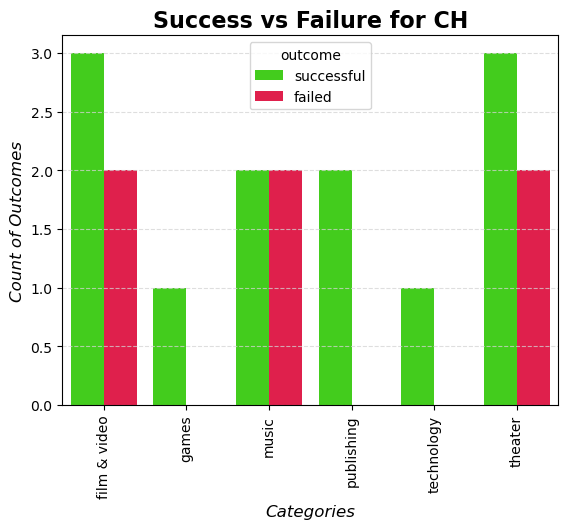

In [58]:
# Dataset
question1ch

# Plot for question1ca
sns.barplot(question1ch, x='category', y='count', hue='outcome', palette='prism')

# customizations
plt.xlabel("Categories", fontstyle="italic", fontsize=12)
plt.ylabel("Count of Outcomes", fontstyle="italic", fontsize=12)
plt.title("Success vs Failure for CH", fontsize=16, fontweight="bold")
plt.xticks(rotation=90)

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.75)

# save chart in Charts folder
plt.savefig('../Charts/success_vs_failure_CH.png', bbox_inches='tight')

# show
plt.show()

In [16]:
# Query for 'AU'
query = """
    SELECT 
        cat.category,
        cam.outcome,
        COUNT(cam.outcome) AS count,
        cam.country
    FROM campaign AS cam
    JOIN category AS cat ON (cam.category_id = cat.category_id)
    WHERE cam.outcome IN ('successful', 'failed')
        AND cam.country = 'CH'
    GROUP BY cat.category, cam.outcome, cam.country
    ORDER BY cat.category, cam.outcome DESC;
    """
question1au = pd.read_sql(text(query), con=engine)
question1au.head(10)

,category,outcome,count,country
0,film & video,successful,3,CH
1,film & video,failed,2,CH
2,games,successful,1,CH
3,music,successful,2,CH
4,music,failed,2,CH
5,publishing,successful,2,CH
6,technology,successful,1,CH
7,theater,successful,3,CH
8,theater,failed,2,CH


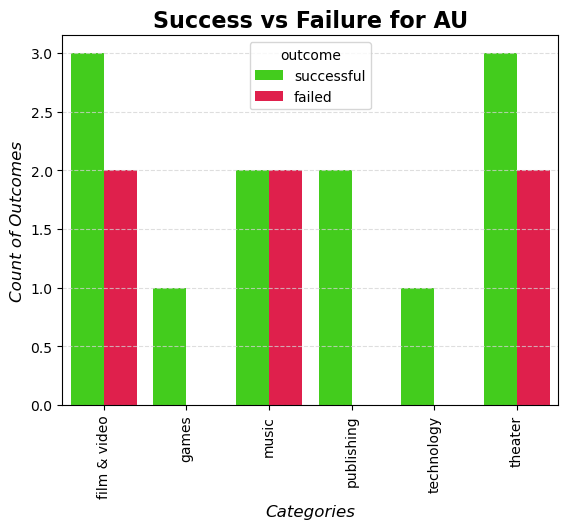

In [59]:
# Dataset
question1au

# Plot for question1us
sns.barplot(question1au, x='category', y='count', hue='outcome', palette='prism')

# customizations
plt.xlabel("Categories", fontstyle="italic", fontsize=12)
plt.ylabel("Count of Outcomes", fontstyle="italic", fontsize=12)
plt.title("Success vs Failure for AU", fontsize=16, fontweight="bold")
plt.xticks(rotation=90)

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.75)

# save chart in Charts folder
plt.savefig('../Charts/success_vs_failure_AU.png', bbox_inches='tight')

# show
plt.show()

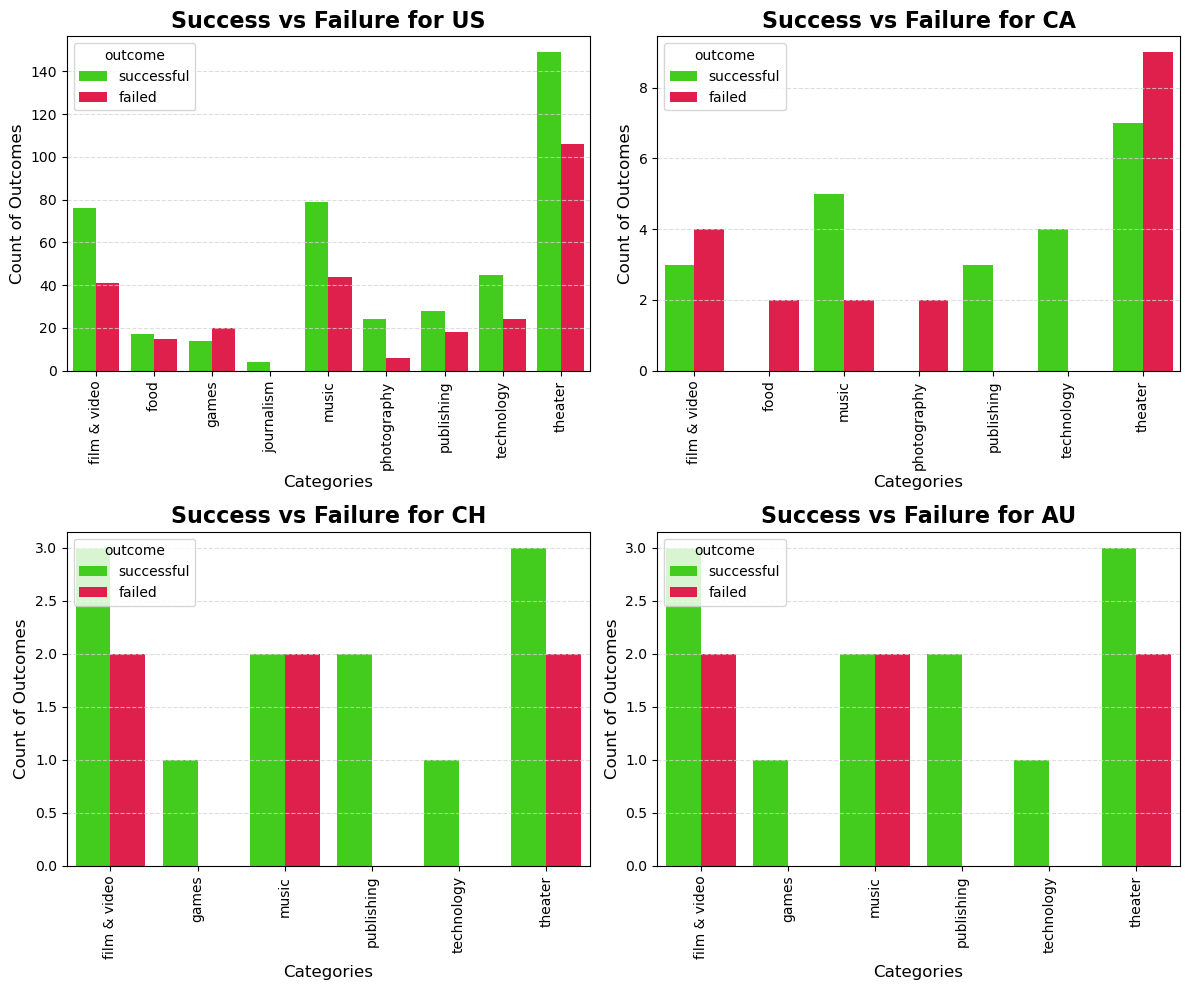

In [60]:
# Create a figure and axes with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for question1us
sns.barplot(data=question1us, x='category', y='count', hue='outcome', palette='prism', ax=axs[0, 0])
axs[0, 0].set_xlabel('Categories', fontsize=12)
axs[0, 0].set_ylabel('Count of Outcomes', fontsize=12)
axs[0, 0].set_title('Success vs Failure for US', fontsize=16, fontweight='bold')
axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 0].grid(color='lightgrey', axis='y', linestyle='--', alpha=0.75)

# Plot for question1ca
sns.barplot(data=question1ca, x='category', y='count', hue='outcome', palette='prism', ax=axs[0, 1])
axs[0, 1].set_xlabel('Categories', fontsize=12)
axs[0, 1].set_ylabel('Count of Outcomes', fontsize=12)
axs[0, 1].set_title('Success vs Failure for CA', fontsize=16, fontweight='bold')
axs[0, 1].tick_params(axis='x', rotation=90)
axs[0, 1].grid(color='lightgrey', axis='y', linestyle='--', alpha=0.75)

# Plot for question1ch
sns.barplot(data=question1ch, x='category', y='count', hue='outcome', palette='prism', ax=axs[1, 0])
axs[1, 0].set_xlabel('Categories', fontsize=12)
axs[1, 0].set_ylabel('Count of Outcomes', fontsize=12)
axs[1, 0].set_title('Success vs Failure for CH', fontsize=16, fontweight='bold')
axs[1, 0].tick_params(axis='x', rotation=90)
axs[1, 0].grid(color='lightgrey', axis='y', linestyle='--', alpha=0.75)

# Plot for question1au
sns.barplot(data=question1au, x='category', y='count', hue='outcome', palette='prism', ax=axs[1, 1])
axs[1, 1].set_xlabel('Categories', fontsize=12)
axs[1, 1].set_ylabel('Count of Outcomes', fontsize=12)
axs[1, 1].set_title('Success vs Failure for AU', fontsize=16, fontweight='bold')
axs[1, 1].tick_params(axis='x', rotation=90)
axs[1, 1].grid(color='lightgrey', axis='y', linestyle='--', alpha=0.75)

plt.tight_layout()

# save chart in Charts folder
plt.savefig('../Charts/success_vs_failure_combined.png', bbox_inches='tight')

# show
plt.show()

In [97]:
# Close Connection
engine.dispose()